# **WORLD HAPPINESS REPORT**


In [65]:
import pandas as pd
data = pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\combined_20202024_cleaned.csv")
df_combined_20202024_cleaned = data  # Değişkene atama yapılıyor
print(df_combined_20202024_cleaned.head())


  Country name  Happiness Rank  Happiness score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy (GDP per Capita)\t  Social support  Healthy life expectancy  \
0                        1.29            1.50                     0.96   
1                        1.33            1.50                     0.98   
2                        1.39            1.47                     1.04   
3                        1.33            1.55                     1.00   
4                        1.42            1.50                     1.01   

   Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0

In [66]:
import pandas as pd
import numpy as np
from scipy import stats  # Hipotez testleri için

# Birleştirilmiş veri kümesini yükleyelim
file_path = r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\combined_20202024_cleaned.csv"
data = pd.read_csv(file_path)

# Sayısal sütunları seçelim
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Temel istatistiksel ölçümleri hesaplayalım
summary_stats = data[numeric_columns].describe()

# Ortalamayı ve varyansı hesaplayalım
mean_values = data[numeric_columns].mean()
variance_values = data[numeric_columns].var()

print("Ortalama Değerler:\n", mean_values)
print("\nVaryans Değerleri:\n", variance_values)

# Hipotez testi: Örneğin, "Happiness Score" yıllara göre anlamlı değişiyor mu?
# 2020 ve 2024 yıllarını karşılaştırıyoruz
data_2020 = data[data["Year"] == 2020]["Happiness score"]
data_2024 = data[data["Year"] == 2024]["Happiness score"]

t_stat, p_value = stats.ttest_ind(data_2020, data_2024, nan_policy='omit')

print("\nT-Test Sonuçları (2020 vs 2024 - Happiness Score):")
print(f"T-istatistiği: {t_stat}, p-değeri: {p_value}")

if p_value < 0.05:
    print("Sonuç: İstatistiksel olarak anlamlı bir fark var.")
else:
    print("Sonuç: İstatistiksel olarak anlamlı bir fark yok.")

# Yeni veriyi kaydedelim
output_path = r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\combined_20202024_analyzed.csv"
data.to_csv(output_path, index=False)
print("\nAnaliz edilmiş veri başarıyla kaydedildi!")


Ortalama Değerler:
 Happiness Rank                    73.401099
Happiness score                    5.524740
Upperwhisker                       5.640658
Lowerwhisker                       5.408864
Economy (GDP per Capita)\t         1.200348
Social support                     1.026796
Healthy life expectancy            0.541228
Freedom to make life choices       0.526359
Generosity                         0.162572
Perceptions of corruption          0.143833
Year                            2021.956044
dtype: float64

Varyans Değerleri:
 Happiness Rank                  1783.594057
Happiness score                    1.240543
Upperwhisker                       1.199548
Lowerwhisker                       1.284997
Economy (GDP per Capita)\t         0.223824
Social support                     0.110645
Healthy life expectancy            0.049869
Freedom to make life choices       0.024249
Generosity                         0.007878
Perceptions of corruption          0.014728
Year                

Temel İstatistiksel Kavramlar ve Veri Analizi

1.1 İstatistik, Olasılık ve Veri Analizi Prensipleri

İstatistik, verileri toplamak, düzenlemek, analiz etmek ve yorumlamak için kullanılan bilim dalıdır. Veri analizi sürecinde temel istatistiksel kavramlar şunlardır:

1.1.1 Ortalama (Mean)

Ortalama, bir veri kümesindeki tüm değerlerin toplamının, eleman sayısına bölünmesiyle elde edilen değerdir.



Burada  her bir veri noktası,  ise veri kümesindeki toplam eleman sayısıdır.

1.1.2 Medyan (Median)

Medyan, sıralanmış bir veri kümesindeki ortanca değerdir. Eğer eleman sayısı tekse tam ortadaki değer, çiftse ortadaki iki değerin ortalamasıdır.

1.1.3 Mod (Mode)

Mod, bir veri kümesinde en sık tekrar eden değerdir. Birden fazla mod olabilir veya hiç mod bulunmayabilir.

1.1.4 Standart Sapma (Standard Deviation)

Standart sapma, verilerin ortalamadan ne kadar saptığını gösterir. Küçük bir standart sapma, verilerin ortalamaya yakın olduğunu gösterirken, büyük bir standart sapma, verilerin geniş bir dağılım gösterdiğini ifade eder.



Burada  veri kümesinin ortalamasıdır.

1.1.5 Varyans (Variance)

Varyans, standart sapmanın karesidir ve verilerin dağılım genişliğini gösterir.



1.1.6 Olasılık Dağılımları (Probability Distributions)

Olasılık dağılımları, bir olayın gerçekleşme ihtimalini gösterir. En yaygın dağılımlardan biri normal dağılımdır. Normal dağılım, çan eğrisi şeklinde olup, birçok doğal olayın dağılımını temsil eder.



Burada  ortalama,  standart sapmadır.

1.1.7 Hipotez Testi (Hypothesis Testing)

Hipotez testi, istatistiksel olarak anlamlı fark olup olmadığını belirlemek için kullanılır. En yaygın kullanılan testlerden biri t-testidir. T-testi, iki grup arasındaki ortalama farkın anlamlı olup olmadığını ölçer.

Hipotez testi şu adımlarla gerçekleştirilir:

H0 (Null Hipotezi): Gruplar arasında fark yoktur.

H1 (Alternatif Hipotez): Gruplar arasında anlamlı fark vardır.

p-değeri hesaplanır:

p < 0.05 ise, H0 reddedilir ve gruplar arasında anlamlı fark olduğu kabul edilir.

p > 0.05 ise, anlamlı fark yoktur.

Bu temel istatistiksel kavramlar veri analizi sürecinde kritik bir rol oynar ve veriyi anlamlandırmak için kullanılır.



1. İstatistik, Olasılık ve Veri Analizi Temelleri
Bu bölümde, istatistik, olasılık ve veri analizi kavramlarını açıklayacağız.

1.1 İstatistik Nedir?
İstatistik, verileri toplama, analiz etme, yorumlama ve sunma bilimidir. İki temel türü vardır:

Tanımlayıcı İstatistikler: Ortalama, medyan, mod, standart sapma gibi verileri özetleyen istatistiklerdir.
Çıkarımsal İstatistikler: Bir örneklemden yola çıkarak genel popülasyon hakkında tahminde bulunmayı içerir (örneğin, hipotez testleri).
1.2 Olasılık Nedir?
Olasılık, bir olayın gerçekleşme ihtimalini ölçen bir matematiksel kavramdır. Örneğin, bir madeni paranın yazı gelme ihtimali 0.5’tir (50%).

Olasılık dağılımları:

Normal Dağılım (Gaussian Distribution): Veri noktalarının çoğu ortalamaya yakın olup, uç değerlere doğru azalan bir dağılımdır.
Binom Dağılımı: Belirli sayıda bağımsız denemede belirli bir olayın kaç kez meydana geleceğini hesaplar.
1.3 Temel Veri Analizi Teknikleri
Ortalama (Mean): Verilerin toplamının, veri sayısına bölünmesiyle elde edilir.
Medyan (Median): Verileri sıraladığımızda ortada kalan değerdir.
Standart Sapma (Standard Deviation): Verilerin ortalama etrafındaki dağılımını gösterir.
Varyans (Variance): Standart sapmanın karesidir, veri noktalarının dağılımını ölçer.
Hipotez Testleri: Bir önermenin doğruluğunu istatistiksel olarak test etmeye yarar. Örneğin, t-test iki grubun ortalamalarının farklı olup olmadığını analiz eder.

2. Python ile İstatistiksel Analiz
Şimdi yukarıdaki kavramları Jupyter Notebook'ta kod yazarak uygulayacağız.

📊 2.1 Ortalama, Medyan, Standart Sapma ve Varyans Hesaplama

In [67]:
import pandas as pd
import numpy as np

# Veriyi yükleme
data = pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\combined_20202024_cleaned.csv")

# Sayısal sütunları seçme
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Temel istatistikleri hesaplama
mean_values = data[numeric_columns].mean()
median_values = data[numeric_columns].median()
std_values = data[numeric_columns].std()
var_values = data[numeric_columns].var()

print("📌 Ortalama Değerler:\n", mean_values)
print("\n📌 Medyan Değerler:\n", median_values)
print("\n📌 Standart Sapma Değerleri:\n", std_values)
print("\n📌 Varyans Değerleri:\n", var_values)


📌 Ortalama Değerler:
 Happiness Rank                    73.401099
Happiness score                    5.524740
Upperwhisker                       5.640658
Lowerwhisker                       5.408864
Economy (GDP per Capita)\t         1.200348
Social support                     1.026796
Healthy life expectancy            0.541228
Freedom to make life choices       0.526359
Generosity                         0.162572
Perceptions of corruption          0.143833
Year                            2021.956044
dtype: float64

📌 Medyan Değerler:
 Happiness Rank                    73.0000
Happiness score                    5.5830
Upperwhisker                       5.6895
Lowerwhisker                       5.4820
Economy (GDP per Capita)\t         1.2395
Social support                     1.0670
Healthy life expectancy            0.5550
Freedom to make life choices       0.5465
Generosity                         0.1490
Perceptions of corruption          0.1105
Year                            2022.0

2.2 Hipotez Testi (T-Test)
Şimdi t-test yaparak, iki veri grubunun ortalamaları arasında istatistiksel olarak anlamlı bir fark olup olmadığını test edelim.

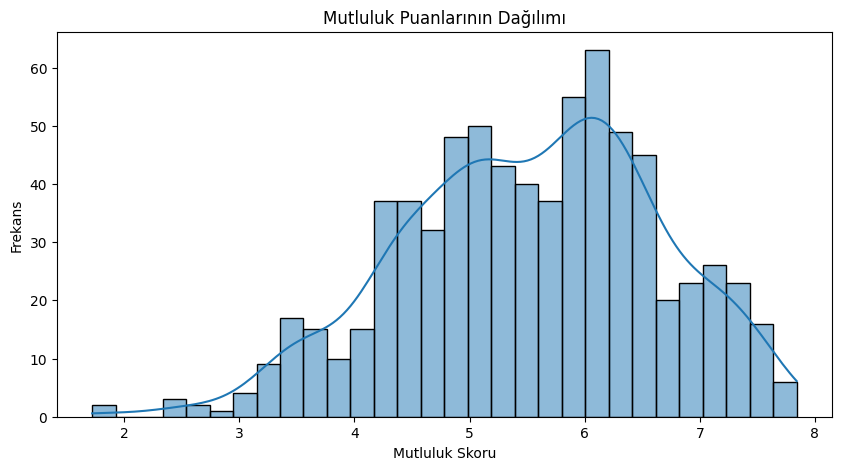

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data["Happiness score"], kde=True, bins=30)
plt.xlabel("Mutluluk Skoru")
plt.ylabel("Frekans")
plt.title("Mutluluk Puanlarının Dağılımı")
plt.show()


Normal Dağılım Grafiği
Mutluluk puanlarının normal dağılımını görmek için histogram çizelim.

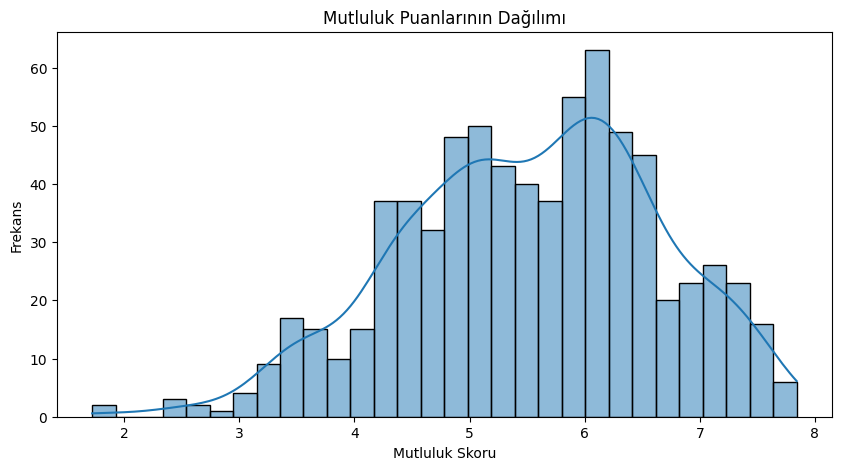

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data["Happiness score"], kde=True, bins=30)
plt.xlabel("Mutluluk Skoru")
plt.ylabel("Frekans")
plt.title("Mutluluk Puanlarının Dağılımı")
plt.show()


🎛 3. Dashboard Entegrasyonu
Şimdi, bu istatistikleri bir dashboard’a nasıl ekleyebileceğimizi düşünelim.

Ortalama ve varyans gibi değerleri gösteren bir tablo ekleyebiliriz.
Normal dağılım histogramını bir görselleştirme olarak ekleyebiliriz.
Hipotez testi sonuçlarını bir metin kutusunda gösterebiliriz.

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
